In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [58]:
mydata = pd.read_csv("Health Data.csv")

In [59]:
mydata.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [60]:
mydata.shape

(1259, 27)

In [61]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [64]:
mydata.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [65]:
mydata.drop(columns=['Timestamp', 'Country','state','no_employees','anonymity','coworkers','comments'],inplace=True)

In [66]:
mydata.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [ ]:
mydata.isnull().sum()

In [109]:
#Keeping dataframe without Null values
mydata.dropna(axis=0,inplace=True)

In [110]:
mydata.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [111]:
mydata.head(10)

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,leave,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,1,1,1,0,3,1,1,2,1,2,0,4,1,1,2,1,2,2,1
20,29,1,0,1,1,3,0,1,2,2,1,1,1,0,1,1,1,1,1,0
21,31,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,1,0,2,0
22,46,1,0,0,1,1,1,1,2,2,1,1,0,0,1,2,1,0,1,0
23,41,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,2,0,0
24,33,1,0,1,1,2,0,1,2,1,0,2,0,1,1,2,1,2,0,0
25,35,1,0,1,1,3,0,0,2,2,1,0,4,2,1,2,1,2,1,0
27,35,0,0,1,1,2,1,1,2,2,0,0,0,1,1,2,0,0,2,0
28,34,1,0,0,1,3,1,1,0,1,1,0,1,1,1,0,1,1,1,0
29,37,1,0,0,0,3,0,1,1,0,1,1,3,2,0,0,1,0,1,0


In [112]:
mydata['Gender'].value_counts()

1    746
0    205
2     21
Name: Gender, dtype: int64

In [113]:
data = {'Gender': ['Male', 'Female', 'Female', 'Male', 'Other']}
df = pd.DataFrame(data)

# perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender'])

# print the encoded dataframe
print(df_encoded)


   Gender_Female  Gender_Male  Gender_Other
0              0            1             0
1              1            0             0
2              1            0             0
3              0            1             0
4              0            0             1


In [114]:
mydata['Gender'].value_counts()

1    746
0    205
2     21
Name: Gender, dtype: int64

In [115]:
type("Gender")

str

In [116]:
mydata['family_history'].value_counts()

0    533
1    439
Name: family_history, dtype: int64

In [77]:
mydata['self_employed'].value_counts()

No     852
Yes    125
Name: self_employed, dtype: int64

In [78]:
mydata['work_interfere'].value_counts()

Sometimes    458
Never        207
Rarely       170
Often        142
Name: work_interfere, dtype: int64

In [79]:
mydata['leave'].value_counts()

Don't know            413
Somewhat easy         210
Very easy             156
Somewhat difficult    108
Very difficult         90
Name: leave, dtype: int64

In [117]:
mydata = mydata[mydata['Age']!=99999999999]
mydata = mydata[mydata['Age']!=-29]
mydata = mydata[mydata['Age']!=-1]
mydata = mydata[mydata['Age']!=329]
mydata = mydata[mydata['Age']!=-1726]
mydata = mydata[mydata['Age']!=5]
mydata = mydata[mydata['Age']!=8]
mydata['Age'].value_counts()

32    66
29    60
26    60
28    54
34    53
30    52
27    51
33    51
31    47
25    46
35    44
23    39
37    33
24    32
36    32
38    31
40    29
39    25
43    20
41    18
42    16
22    15
21    14
45    11
46    11
44     8
19     6
18     5
48     5
20     5
56     4
51     4
50     4
49     4
54     3
55     3
57     3
61     1
72     1
11     1
62     1
53     1
47     1
58     1
60     1
Name: Age, dtype: int64

<ipython-input-118-a797dd3690b8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(mydata["Age"])


Text(0.5, 0, 'Age')

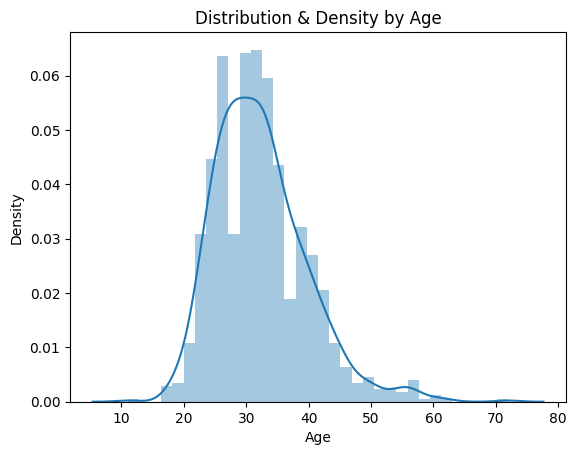

In [118]:
sb.distplot(mydata["Age"])
plt.title("Distribution & Density by Age")
plt.xlabel("Age")

In [119]:
mydata.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [122]:
mydata.head(10)

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,leave,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,1,1,1,0,3,1,1,2,1,2,0,4,1,1,2,1,2,2,1
20,29,1,0,1,1,3,0,1,2,2,1,1,1,0,1,1,1,1,1,0
21,31,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,1,0,2,0
22,46,1,0,0,1,1,1,1,2,2,1,1,0,0,1,2,1,0,1,0
23,41,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,2,0,0
24,33,1,0,1,1,2,0,1,2,1,0,2,0,1,1,2,1,2,0,0
25,35,1,0,1,1,3,0,0,2,2,1,0,4,2,1,2,1,2,1,0
27,35,0,0,1,1,2,1,1,2,2,0,0,0,1,1,2,0,0,2,0
28,34,1,0,0,1,3,1,1,0,1,1,0,1,1,1,0,1,1,1,0
29,37,1,0,0,0,3,0,1,1,0,1,1,3,2,0,0,1,0,1,0


In [123]:
from sklearn.preprocessing import LabelEncoder

# create a label encoder object
le = LabelEncoder()

# define the columns to be encoded
cols_to_encode = ['Gender', 'self_employed', 'family_history', 'work_interfere', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

# apply label encoding to each column
for col in cols_to_encode:
    mydata[col] = le.fit_transform(mydata[col])


In [124]:
x = mydata.drop(["treatment"],axis = 1)
y = mydata["treatment"]

In [125]:
mydata.head(10)

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,leave,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,1,1,1,0,3,1,1,2,1,2,0,4,1,1,2,1,2,2,1
20,29,1,0,1,1,3,0,1,2,2,1,1,1,0,1,1,1,1,1,0
21,31,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,1,0,2,0
22,46,1,0,0,1,1,1,1,2,2,1,1,0,0,1,2,1,0,1,0
23,41,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,2,0,0
24,33,1,0,1,1,2,0,1,2,1,0,2,0,1,1,2,1,2,0,0
25,35,1,0,1,1,3,0,0,2,2,1,0,4,2,1,2,1,2,1,0
27,35,0,0,1,1,2,1,1,2,2,0,0,0,1,1,2,0,0,2,0
28,34,1,0,0,1,3,1,1,0,1,1,0,1,1,1,0,1,1,1,0
29,37,1,0,0,0,3,0,1,1,0,1,1,3,2,0,0,1,0,1,0


In [126]:
le = LabelEncoder()
mydata['treatment'] = le.fit_transform(mydata['treatment'])

In [127]:
mydata.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,leave,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,1,1,1,0,3,1,1,2,1,2,0,4,1,1,2,1,2,2,1
20,29,1,0,1,1,3,0,1,2,2,1,1,1,0,1,1,1,1,1,0
21,31,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,1,0,2,0
22,46,1,0,0,1,1,1,1,2,2,1,1,0,0,1,2,1,0,1,0
23,41,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,2,0,0


In [128]:
# separating the data and labels
X = mydata.drop(columns = 'treatment', axis=1)
Y = mydata['treatment']
Y.shape

(972,)

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
x = mydata.drop(["treatment"],axis = 1)
y = mydata["treatment"]

In [131]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [132]:
print(X.shape,X_train.shape,X_test.shape,Y.shape)

(972, 19) (777, 19) (195, 19) (972,)


In [133]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm

In [134]:
# Import required libraries
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X = mydata.drop('treatment', axis=1)
y = mydata['treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=127)

# Create the logistic regression model and train it on the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_pred = lr.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8307692307692308


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [135]:
from sklearn.neighbors import KNeighborsClassifier

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=81)

# create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# train the KNN classifier on the training data
knn.fit(X_train, y_train)

# make predictions on the testing data
y_pred = knn.predict(X_test)

# evaluate the performance of the KNN classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7538461538461538


In [136]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

# initialize the AdaBoost classifier with a decision tree as the weak classifier
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=11, random_state=192)

# train the classifier on the training data
clf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = clf.predict(X_test)

# evaluate the performance of the classifier
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8358974358974359


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [137]:
from sklearn.ensemble import RandomForestClassifier

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

# create a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the Random Forest classifier on the training data
rf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rf.predict(X_test)

# evaluate the performance of the Random Forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8205128205128205


In [138]:
classifier=svm.SVC(kernel='linear')

In [139]:
#fitting our model to classifier
classifier.fit(X_train,y_train)
X_train_pred=classifier.predict(X_train)
training_accuracy=accuracy_score(X_train_pred, y_train)
print("The mean training accuracy is %s" % round(training_accuracy*100,2))

The mean training accuracy is 76.32


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


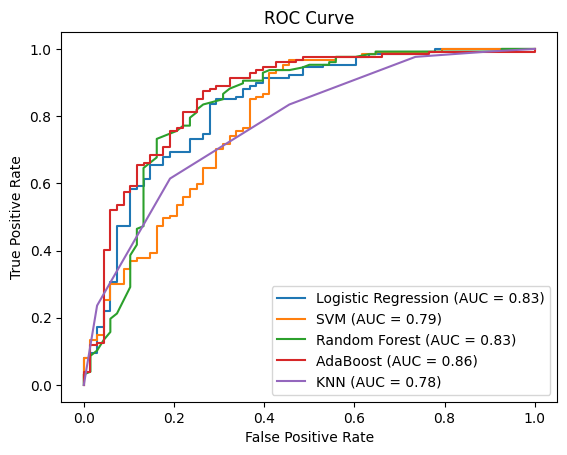

In [140]:
from sklearn.metrics import roc_curve, auc

logreg = LogisticRegression()
svm = svm.SVC(probability=True)
rf = RandomForestClassifier()
clf = AdaBoostClassifier()
knn = KNeighborsClassifier()


# Train the classifiers
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
clf.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Compute the false positive rate, true positive rate and threshold values for each classifier
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
clf_fpr, clf_tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1])


# Compute the AUC score for each classifier
logreg_auc = auc(logreg_fpr, logreg_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
rf_auc = auc(rf_fpr, rf_tpr)
clf_auc = auc(clf_fpr, clf_tpr)
knn_auc = auc(knn_fpr, knn_tpr)


# Plot the ROC curves and AUC scores for each classifier
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = %0.2f)' % logreg_auc)
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = %0.2f)' % svm_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot(clf_fpr, clf_tpr, label='AdaBoost (AUC = %0.2f)' % clf_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = %0.2f)' % knn_auc)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


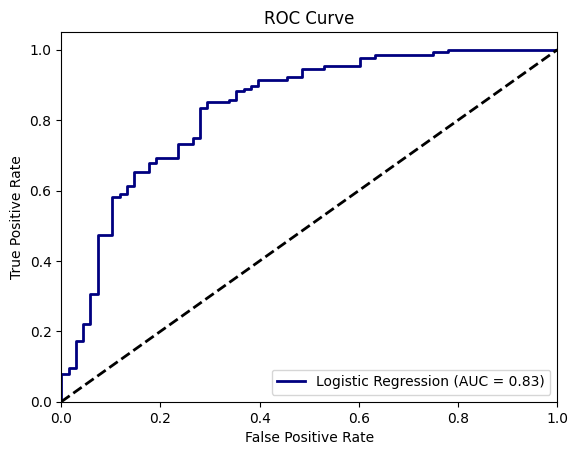

In [141]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
logreg_auc = auc(logreg_fpr, logreg_tpr)
plt.plot(logreg_fpr, logreg_tpr, color='navy', lw=2, label='Logistic Regression (AUC = %0.2f)' % logreg_auc)

plt.plot([0,1],[0,1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

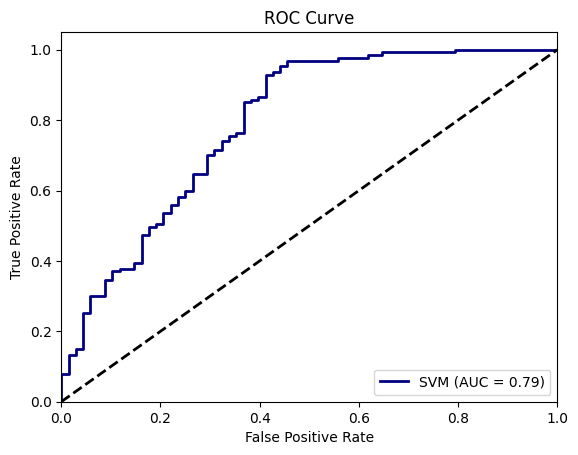

In [142]:
from sklearn import svm
svm = svm.SVC(probability=True)
svm.fit(X_train, y_train)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
svm_auc = auc(svm_fpr, svm_tpr)
plt.plot(svm_fpr, svm_tpr, color='navy', lw=2, label='SVM (AUC = %0.2f)' % svm_auc)

plt.plot([0,1],[0,1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

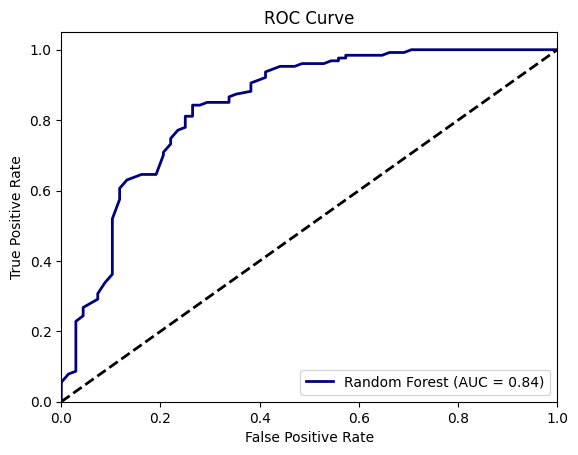

In [143]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
rf_auc = auc(rf_fpr, rf_tpr)
plt.plot(rf_fpr, rf_tpr, color='navy', lw=2,label='Random Forest (AUC = %0.2f)' % rf_auc)

plt.plot([0,1],[0,1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

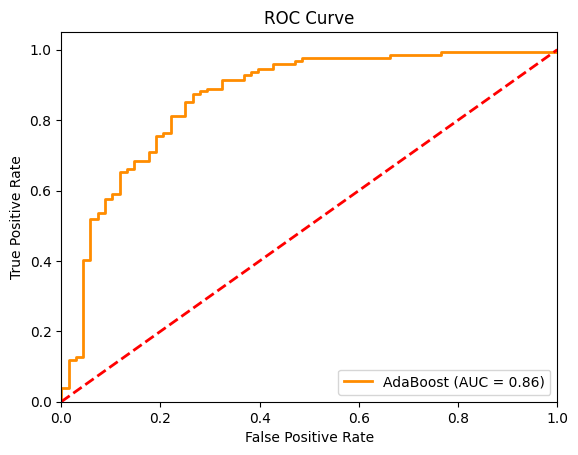

In [144]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
clf_fpr, clf_tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
clf_auc = auc(clf_fpr, clf_tpr)
plt.plot(clf_fpr, clf_tpr, color='darkorange',lw=2, label='AdaBoost (AUC = %0.2f)' % clf_auc)

plt.plot([0,1],[0,1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

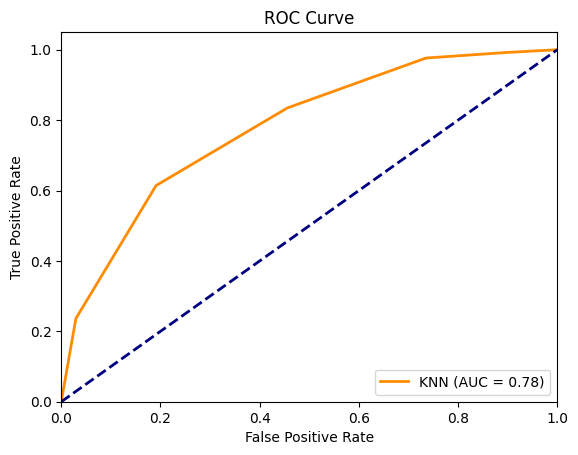

In [145]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
knn_auc = auc(knn_fpr, knn_tpr)
plt.plot(knn_fpr, knn_tpr, color='darkorange',lw=2, label='KNN (AUC = %0.2f)' % knn_auc)

plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [148]:
input_data = (46,1,1,1,3,1,1,2,1,2,0,4,1,1,2,1,2,2,1)
input_data_as_numpy_array= np.asarray(input_data)         # change the input data to a numpy array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)# reshaPING as we are predicting for only on instance

prediction = clf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('No Need for Treatment')
else:
  print('Need for Treatment')

[1]
Need for Treatment


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [149]:
import pickle

In [150]:
filename = 'prediction_model.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [151]:
loaded_model = pickle.load(open('prediction_model.pkl', 'wb'))


In [152]:
input_data = (46,1,1,1,3,1,1,2,1,2,0,4,1,1,2,1,2,2,1)
input_data_as_numpy_array= np.asarray(input_data)         # change the input data to a numpy array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)# reshaPING as we are predicting for only on instance

prediction = clf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('No Need for Treatment')
else:
  print('Need for Treatment')

[1]
Need for Treatment


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [153]:
for column in X.columns:
  print(column)

Age
Gender
self_employed
family_history
work_interfere
remote_work
tech_company
benefits
care_options
wellness_program
seek_help
leave
mental_health_consequence
phys_health_consequence
supervisor
mental_health_interview
phys_health_interview
mental_vs_physical
obs_consequence
